In [2]:
import nbsetup
import ensemblepy as ep

import numpy as np
import seaborn as sns
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
def mixed(percent, count=5000):
    p = int(count*(1-percent))
    if p == count: 
        return np.ones(count)
    elif p == 0:
        return np.linspace(0, 1, count)
    else:
        return np.concatenate([np.ones(p), np.linspace(0, 1, count-p)])

In [4]:
x = np.linspace(0,1,50)
doto = []
for i in x:
    dist = mixed(i)
    doto.append({
        'x': i,
        'density': ep.density_variance(dist),
        'hue': 0,
    })
    for b in range(2,100,5):
        bins = np.linspace(0,1,b+1)
        hist, _ = np.histogram(dist, bins=bins)
        entropy = sp.stats.entropy(hist)
        max_ent = np.log(b)
        doto.append({
            'x': i,
            'entropy': entropy,
            'jaynes': max_ent-entropy, # or can use sp.stats.entropy(hist, np.ones(b)/b),
            'div': entropy/max_ent,
            'hue': b,
        })

doto = pd.DataFrame(doto)

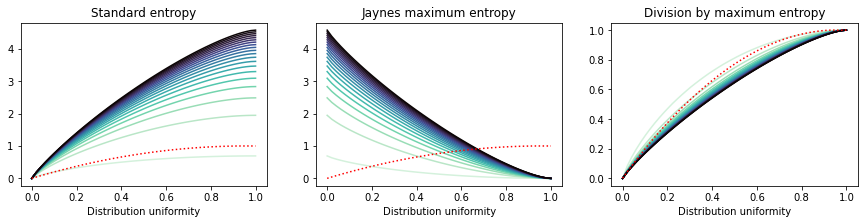

In [6]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,3))
compares = (('entropy', 'Standard entropy'),
          ('jaynes', 'Jaynes maximum entropy'),
          ('div', 'Division by maximum entropy'))
for i, lt in enumerate(compares):
    sns.lineplot(data=doto, x='x', y=lt[0], hue='hue', ax=axes[i], legend=False, palette='mako_r').set(title=lt[1], ylabel=None, xlabel='Distribution uniformity')
    sns.lineplot(data=doto, x='x', y='density', ax=axes[i], linestyle='dotted', color='red').set(ylabel=None)

fig.savefig('comparison.eps')

In [ ]:
data = {'obs':[], 'steps': [], 'k': []}

for i in x:
    # observations
    for o in range(20, 100, 10):
        data['obs'].append({
            'x': i,
            'y': dv.density_variance(mixed(i, count=o)),
            'spread': o,
        })
    dist = mixed(i)
    # steps
    for s in range(100, 1000, 200):
        data['steps'].append({
            'x': i,
            'y': dv.density_variance(dist, steps=s),
            'spread': s,
        })
    # k
    for k in range(20, 80, 20):
        data['k'].append({
            'x': i,
            'y': dv.density_variance(dist, k=k, bounded=False),
            'spread': k,
        })